<a href="https://colab.research.google.com/github/Sagar-modelling/LSTM_Autoencoders/blob/main/autoencoder_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bnsreenu/python_for_microscopists/master/other_files/anomaly.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [2]:
import matplotlib.pyplot as plt

In [3]:
df.head()

,Power,Detector,Quality
Date,,,
2016-01-01,96,8,Good
2016-01-02,96,10,Good
2016-01-03,91,8,Good
2016-01-04,97,9,Good
2016-01-05,91,11,Good


In [4]:
df.value_counts('Quality')

Quality
Good    1054
Bad      407
dtype: int64

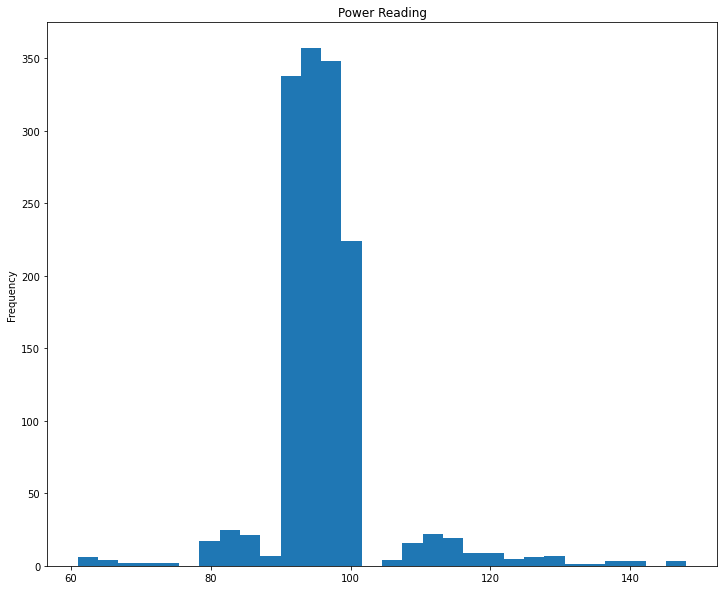

In [5]:
df['Power'].plot(kind='hist', title='Power Reading', bins=30, figsize=(12,10)) 

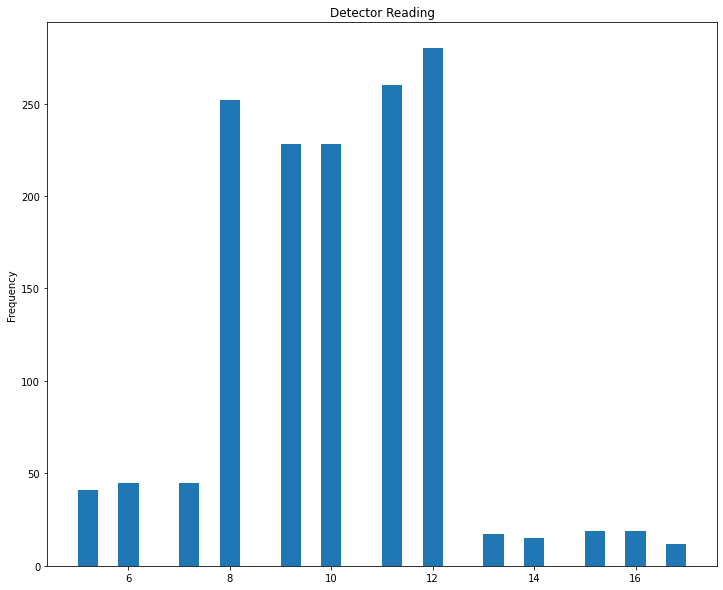

In [6]:
df['Detector'].plot(kind='hist', title='Detector Reading', bins=30, figsize=(12,10)) 

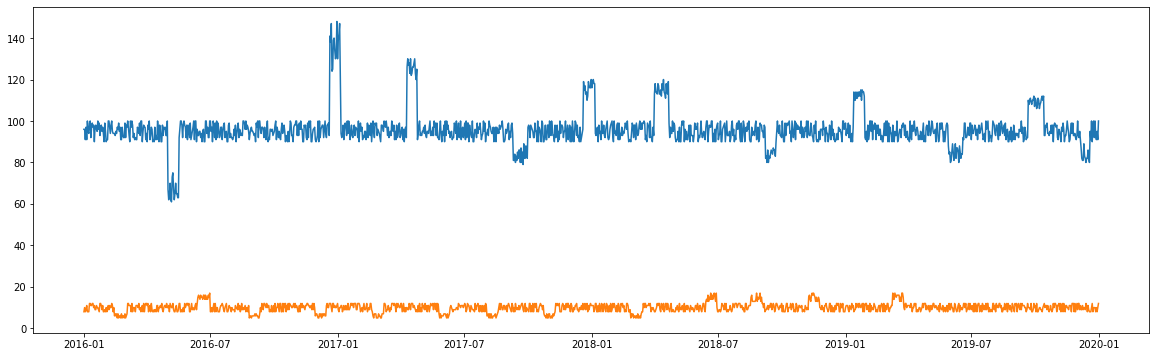

In [7]:
plt.figure(figsize = (20,6))
plt.plot(df.index, df.Power, df.Detector)

In [8]:
#To see how the data is spread betwen Good and Bad
df.groupby('Quality')['Quality'].count()

Quality
Bad      407
Good    1054
Name: Quality, dtype: int64

In [9]:
#If there are missing entries, drop them.
df.dropna(inplace=True,axis=1)

In [10]:
#COnvert non-numeric to numeric
df.Quality[df.Quality == 'Good'] = 1
df.Quality[df.Quality == 'Bad'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df.head()

,Power,Detector,Quality
Date,,,
2016-01-01,96,8,1
2016-01-02,96,10,1
2016-01-03,91,8,1
2016-01-04,97,9,1
2016-01-05,91,11,1


In [12]:
good_mask = df['Quality']== 1 #All good to be True for good data points
bad_mask = df['Quality']== 2 #All values False for good data points

In [13]:
df.drop('Quality',axis=1,inplace=True)

In [14]:
df_good = df[good_mask]
df_bad = df[bad_mask]

In [15]:
# This is the feature vector that goes to the neural net
x_good = df_good.values
x_bad = df_bad.values

In [16]:
from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

In [17]:
from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(x_good.shape[1])) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
 dense_10 (Dense)            (None, 10)                40        
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_good_train,x_good_train,verbose=2,epochs=100)

Epoch 1/100
25/25 - 1s - loss: 4564.5039 - 712ms/epoch - 28ms/step
Epoch 2/100
25/25 - 0s - loss: 4561.8789 - 36ms/epoch - 1ms/step
Epoch 3/100
25/25 - 0s - loss: 4559.2573 - 39ms/epoch - 2ms/step
Epoch 4/100
25/25 - 0s - loss: 4556.6357 - 39ms/epoch - 2ms/step
Epoch 5/100
25/25 - 0s - loss: 4554.0181 - 45ms/epoch - 2ms/step
Epoch 6/100
25/25 - 0s - loss: 4551.3999 - 38ms/epoch - 2ms/step
Epoch 7/100
25/25 - 0s - loss: 4548.7856 - 36ms/epoch - 1ms/step
Epoch 8/100
25/25 - 0s - loss: 4546.1714 - 49ms/epoch - 2ms/step
Epoch 9/100
25/25 - 0s - loss: 4543.5591 - 35ms/epoch - 1ms/step
Epoch 10/100
25/25 - 0s - loss: 4540.9502 - 35ms/epoch - 1ms/step
Epoch 11/100
25/25 - 0s - loss: 4538.3413 - 37ms/epoch - 1ms/step
Epoch 12/100
25/25 - 0s - loss: 4535.7354 - 37ms/epoch - 1ms/step
Epoch 13/100
25/25 - 0s - loss: 4533.1309 - 44ms/epoch - 2ms/step
Epoch 14/100
25/25 - 0s - loss: 4530.5283 - 38ms/epoch - 2ms/step
Epoch 15/100
25/25 - 0s - loss: 4527.9277 - 36ms/epoch - 1ms/step
Epoch 16/100
25/2

In [22]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))

In [23]:
print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Out of Sample Good Score (RMSE): {score2}")
print(f"Bad sample Score (RMSE): {score3}")

Insample Good Score (RMSE): 65.76771277001197
Out of Sample Good Score (RMSE): 65.68814669451218
Bad sample Score (RMSE): 68.648097008018


In [1]:
!pip install tensorflow-gpu==2.4.0
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Model
import seaborn as sns
import plotly.graph_objects as go

In [3]:
!nvidia-smi

Tue Jul 12 06:19:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
df = pd.read_csv('/content/drive/MyDrive/time series data/GE.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1970-01-02,6.209936,6.219952,6.129808,6.139824,1.269186,289536
1,1970-01-05,6.139824,6.169872,6.059696,6.109776,1.262975,529152
2,1970-01-06,6.099760,6.099760,5.899439,5.929487,1.225707,443040
3,1970-01-07,5.949519,6.039663,5.949519,5.959535,1.231918,575328
4,1970-01-08,5.979567,6.069712,5.979567,6.009615,1.242270,1737216
...,...,...,...,...,...,...,...
13242,2022-07-01,63.490002,64.540001,62.209999,63.540001,63.540001,6849000
13243,2022-07-05,61.509998,62.110001,59.930000,62.029999,62.029999,8030600
13244,2022-07-06,61.560001,62.360001,60.730000,61.570000,61.570000,4892300
13245,2022-07-07,62.570000,63.130001,61.939999,63.000000,63.000000,6298800


In [6]:
df1 = df[['Date','Close']]

In [7]:
df1

,Date,Close
0,1970-01-02,6.139824
1,1970-01-05,6.109776
2,1970-01-06,5.929487
3,1970-01-07,5.959535
4,1970-01-08,6.009615
...,...,...
13242,2022-07-01,63.540001
13243,2022-07-05,62.029999
13244,2022-07-06,61.570000
13245,2022-07-07,63.000000


In [8]:
df1['Date'] = pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


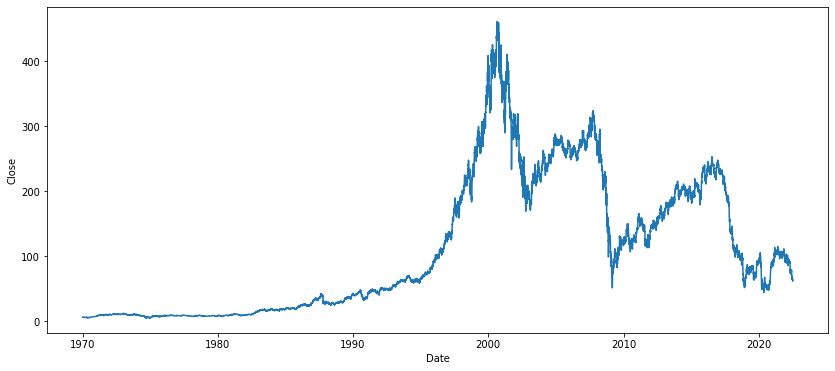

In [9]:
plt.figure(figsize = (14,6))
sns.lineplot(x = df1['Date'], y= df1['Close'])

In [10]:
df1['Date'].min(), df1['Date'].max()

(Timestamp('1970-01-02 00:00:00'), Timestamp('2022-07-08 00:00:00'))

In [13]:
train, test = df1.loc[df['Date'] <= '2003-12-31'], df1.loc[df['Date'] > '2003-12-31']
print(train.shape, test.shape)

(8586, 2) (4661, 2)


In [29]:
#train_size = int(len(df1) * 0.95)
#test_size = len(df1) - train_size
#train, test = df1.iloc[0:train_size], df1.iloc[train_size:len(df1)]
#print(train.shape, test.shape)

(12584, 2) (663, 2)


In [12]:
scaler = StandardScaler()

In [14]:
train['Close'] = scaler.fit_transform(train['Close'].values.reshape(-1,1)) #Scaling the data using z score normalisation
test['Close'] = scaler.transform(test['Close'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


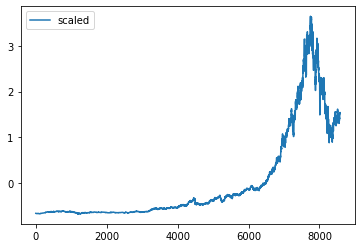

In [15]:
# Visualize scaled data
plt.plot(train['Close'], label = 'scaled')
plt.legend()
plt.show()

# Create Sequences

In [16]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
seq_size = 30  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

In [17]:
def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['Close']], train['Close'], seq_size)
testX, testY = to_sequences(test[['Close']], test['Close'], seq_size)
print("Training input shape: ", trainX.shape)
print("Testing input shape: ", testX.shape)

Training input shape:  (8556, 30, 1)
Testing input shape:  (4631, 30, 1)


# Build a model
We are building LSTM Autoencoder model. The model will take input of shape (batch_size, sequence_length, num_features) and return output of the same shape. In this case, sequence_length is 30 and num_features is 1

In [18]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mae")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [19]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1, shuffle = False)

Epoch 1/10
241/241 [==============================] - 16s 11ms/step - loss: 0.1062 - val_loss: 0.1389
Epoch 2/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0959 - val_loss: 0.1516
Epoch 3/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0459 - val_loss: 0.1262
Epoch 4/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0326 - val_loss: 0.1172
Epoch 5/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0560 - val_loss: 0.3464
Epoch 6/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0460 - val_loss: 0.1636
Epoch 7/10
241/241 [==============================] - 2s 8ms/step - loss: 0.0320 - val_loss: 0.1116
Epoch 8/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0549 - val_loss: 0.1278
Epoch 9/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0265 - val_loss: 0.1057
Epoch 10/10
241/241 [==============================] - 2s 7ms/step - loss: 0.0345 - val_loss: 0.18

In [ ]:
###########################
#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

# Plot Training - Validation loss

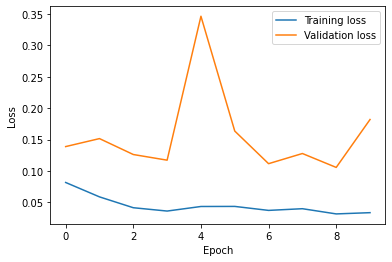

In [20]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

Reconstruction error threshold: 0.4


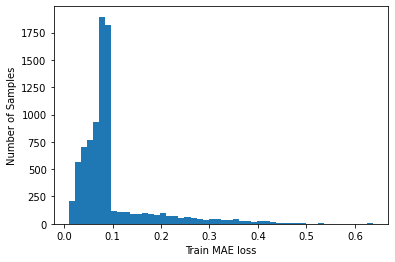

In [83]:
# Mean Absolute Error loss
X_train_pred = model.predict(trainX)
train_mae_loss = np.mean(np.abs(X_train_pred - trainX), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# Set reconstruction error threshold
threshold = 0.4 #np.max(train_mae_loss)

print('Reconstruction error threshold:',threshold)

# Predict Anomalies on test data using threshold

145/145 [==============================] - 1s 4ms/step


Text(0, 0.5, 'Number of samples')

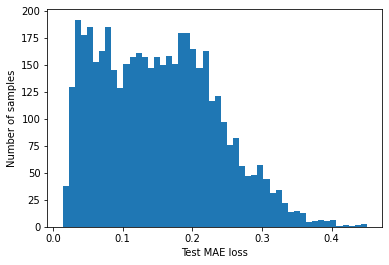

In [84]:
X_test_pred = model.predict(testX, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-testX), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [85]:
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

In [86]:
anomaly_df.head()

,Date,Close,loss,threshold,anomaly
8616,2004-02-17,1.686860,0.213961,0.4,False
8617,2004-02-18,1.665017,0.218251,0.4,False
8618,2004-02-19,1.654096,0.211035,0.4,False
8619,2004-02-20,1.661377,0.199780,0.4,False
8620,2004-02-23,1.713798,0.195750,0.4,False


In [113]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [88]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies.head()

,Date,Close,loss,threshold,anomaly
9647,2008-03-24,2.003572,0.409105,0.4,True
9648,2008-03-25,1.994107,0.442996,0.4,True
9649,2008-03-26,1.983914,0.450771,0.4,True
9650,2008-03-27,1.962071,0.443351,0.4,True
9651,2008-03-28,1.946054,0.423367,0.4,True


In [135]:
anomalies.shape

(14, 5)

In [137]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['Close'], name='Close price'))
fig.add_trace(go.Scatter(x=anomalies['Date'], y=anomalies['Close'], mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

# Another method of Visualisation

In [28]:
X_train_pred = model.predict(trainX)
train_mae_loss = np.mean(np.abs(X_train_pred - trainX), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



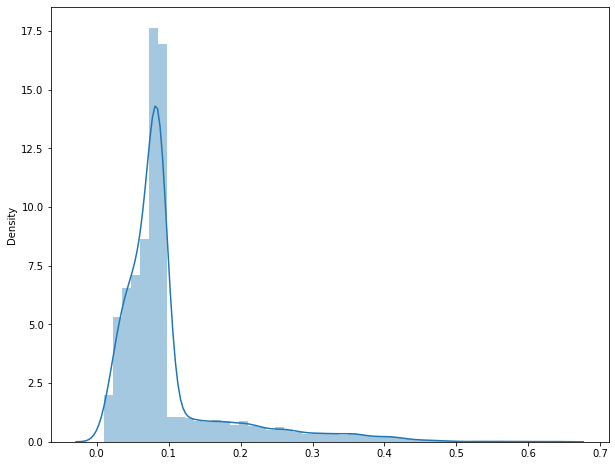

In [49]:
plt.figure(figsize = (10,8))
sns.distplot(train_mae_loss, bins=50, kde=True);

In [50]:
X_test_pred = model.predict(testX)
test_mae_loss = np.mean(np.abs(X_test_pred - testX), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



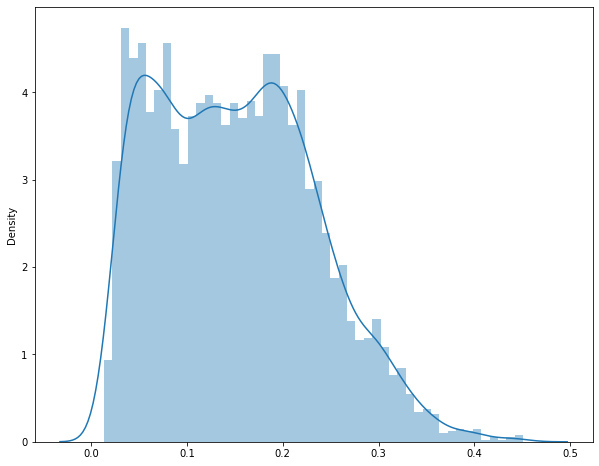

In [51]:
plt.figure(figsize = (10,8))
sns.distplot(test_mae_loss, bins=50, kde=True);

In [81]:
THRESHOLD = 0.4

test_score_df = pd.DataFrame(index=test[seq_size:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['Close'] = test[seq_size:].Close

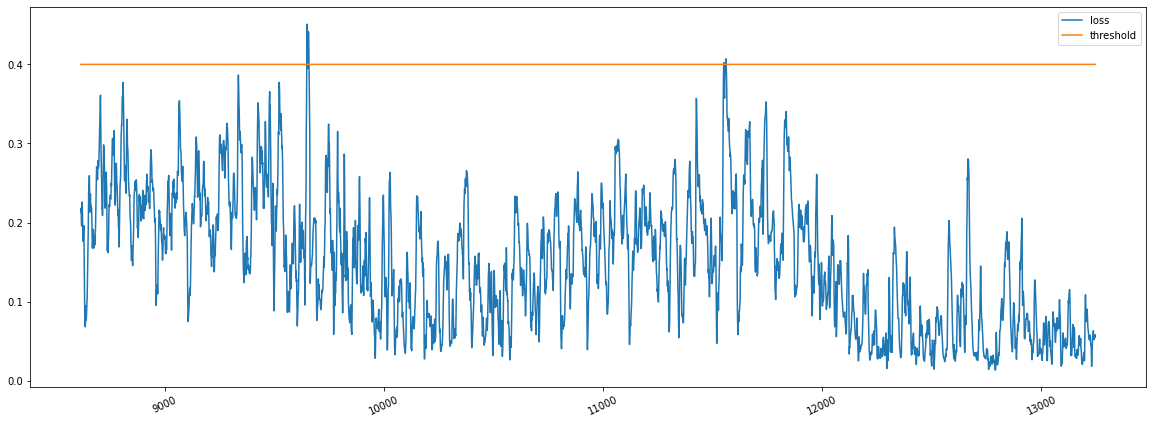

In [56]:
plt.figure(figsize = (20,7))
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [57]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly,Close
9647,0.409105,0.4,True,2.003572
9648,0.442996,0.4,True,1.994107
9649,0.450771,0.4,True,1.983914
9650,0.443351,0.4,True,1.962071
9651,0.423367,0.4,True,1.946054
